In [37]:
#install.packages("isdals", repos='http://cran.us.r-project.org')

In [38]:
#install.packages("ppcor", repos='http://cran.us.r-project.org')

In [39]:
data(bodyfat, package='isdals')

In [40]:
library(ppcor)

In [41]:
bodyfat

Fat  Triceps Thigh Midarm
1  11.9 19.5    43.1  29.1  
2  22.8 24.7    49.8  28.2  
3  18.7 30.7    51.9  37.0  
4  20.1 29.8    54.3  31.1  
5  12.9 19.1    42.2  30.9  
6  21.7 25.6    53.9  23.7  
7  27.1 31.4    58.5  27.6  
8  25.4 27.9    52.1  30.6  
9  21.3 22.1    49.9  23.2  
10 19.3 25.5    53.5  24.8  
11 25.4 31.1    56.6  30.0  
12 27.2 30.4    56.7  28.3  
13 11.7 18.7    46.5  23.0  
14 17.8 19.7    44.2  28.6  
15 12.8 14.6    42.7  21.3  
16 23.9 29.5    54.4  30.1  
17 22.6 27.7    55.3  25.7  
18 25.4 30.2    58.6  24.6  
19 14.8 22.7    48.2  27.1  
20 21.1 25.2    51.0  27.5

These variables are highly related as seen:

# Correlations

The following objects are masked from bodyfat (pos = 5):

    Fat, Midarm, Thigh, Triceps



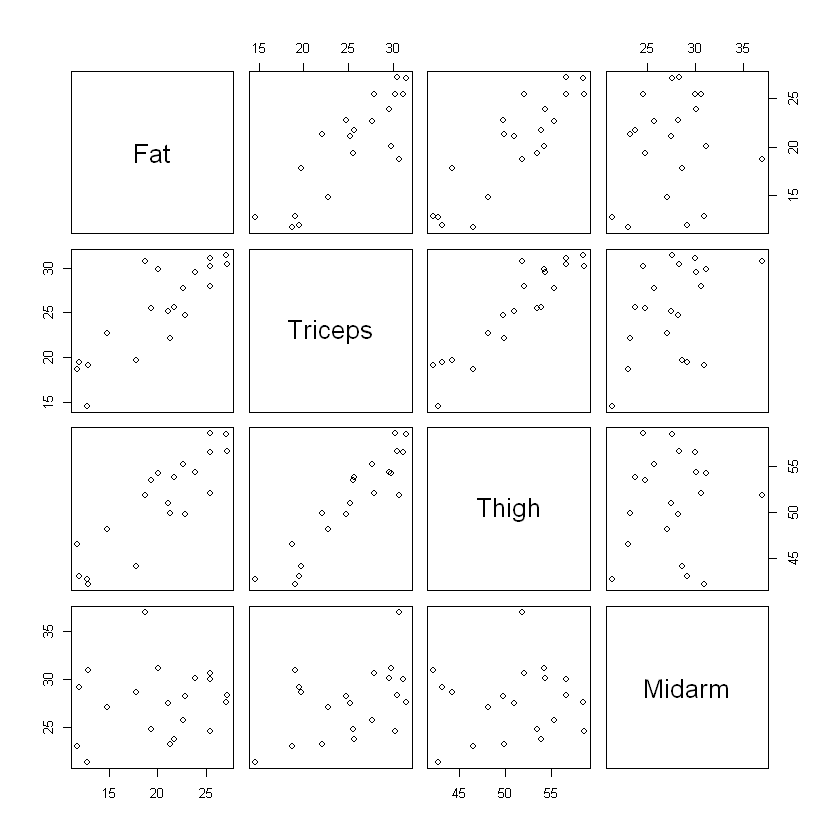

In [42]:
attach(bodyfat)
pairs( cbind( Fat, Triceps, Thigh, Midarm) )

Pair wise correlations:

In [43]:
t=cor( cbind( Fat, Triceps, Thigh, Midarm) )     
t

Fat       Triceps   Thigh     Midarm   
Fat     1.0000000 0.8432654 0.8780896 0.1424440
Triceps 0.8432654 1.0000000 0.9238425 0.4577772
Thigh   0.8780896 0.9238425 1.0000000 0.0846675
Midarm  0.1424440 0.4577772 0.0846675 1.0000000

In [44]:
cor_Fat_thigh=t[2][1]
cor_Fat_thigh                        

[1] 0.8432654

# A partial correlation intuition

In [45]:
Fat.hat = predict(lm(Fat~Thigh))
Triceps.hat = predict( lm(Triceps~Thigh) )
cor( (Fat- Fat.hat), (Triceps- Triceps.hat) ) 

[1] 0.1749822

<ul>
<li> (Fat-Fat.hat) is the residual Fat which has excluded the thigh's(ie Fat.hat) effect on Fat. </li>
<li>(Triceps-Triceps.hat) is the residual Triceps which has excluded the thigh's(ie Triceps.hat) effect on Triceps.</li>
</ul>

We have high correlation between Fat and Triceps (due to Thighs) but low partial correlation (∂Fat)/(∂Triceps) when Thigh is held constant. 

Explanation:<br>
let Fat be linear model of:<br>
Fat=c1.Triceps+c2.Thighs		(regressed by: Fat.hat = (c1.hat).Triceps+(c2.hat).Thighs)<br>
then:<br>
∂Fat/∂Triceps = c1 i.e. the partial correlation may be low ie (0.1749) <br>
but <br>
<b>d</b>Fat/<b>d</b>Triceps = c1+c2.<b>d</b>Thighs/<b>d</b>Triceps i.e. general correlation may be high ie (0.8432) <br>
due to high linear correlation (not partial correlation!) between Thighs and Triceps themselves (0.923), hinting at multicollinearity in the above linear regression model. 


# Actual Partial correlations

We can do the same for Fat and Triceps taking all other variables as given ie this time Midarm and Thighs

In [46]:
Fat.hat = predict(lm(Fat~Thigh+Midarm))
Triceps.hat = predict( lm(Triceps~Thigh+Midarm) )
cor( (Fat- Fat.hat), (Triceps- Triceps.hat) ) 

[1] 0.33815

Above value is nicely obtained by use of pcor listing all pairwise partial correlation coefficients

In [48]:
pt=pcor( cbind( Fat, Triceps, Thigh, Midarm) )
pt$estimate

Fat        Triceps   Thigh      Midarm    
Fat      1.0000000 0.3381500 -0.2665991 -0.3240520
Triceps  0.3381500 1.0000000  0.9963725  0.9955918
Thigh   -0.2665991 0.9963725  1.0000000 -0.9926612
Midarm  -0.3240520 0.9955918 -0.9926612  1.0000000